__Задание 1__

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

Подгруппа – Sub-Category
Дата – Order_date
Сделать вывод на основе полученных результатов.

**Задание 2**

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

__Задание 3__

 Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

Замечания: Работу лучше выполнить в jupyter и там же написать выводы по каждому заданию. После выполнения загрузите код на github.

In [68]:
import pandas as pd
import datetime 
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import requests
from urllib.parse import urlencode

%matplotlib inline

In [69]:
train_key = 'https://disk.yandex.ru/d/zk0SJUi_1E-u7g'

In [70]:
# функция загрузки файла с Яндекс-диска
def get_yandex_csv(public_key, sep):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    download_response = requests.get(download_url)
    return pd.read_csv(download_url, sep=sep)

In [71]:
df = get_yandex_csv(train_key, sep = ',')
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [72]:
df.shape

(9800, 6)

In [73]:
df.dtypes

ID               int64
Order Date      object
Class           object
Region          object
Sub-Category    object
Sales           object
dtype: object

In [74]:
# переименовала столбцы для комфорта работы с данными
df = df.rename(columns={'Order Date': 'Order_Date', 'Sub-Category': 'Sub_Category'})
df.head(3)

,ID,Order_Date,Class,Region,Sub_Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"


In [75]:
# преобразование даты
df['Order_Date'] = pd.to_datetime(df.Order_Date)

In [76]:
# функция преобразования строки в число с плавающей точкой
def convert_to_float(value):
    return round(float(value.replace(',', '.')),2)

In [77]:
df['Sales'] = df['Sales'].apply(convert_to_float)

In [78]:
# проверяем изменение типа данных
df.dtypes

ID                       int64
Order_Date      datetime64[ns]
Class                   object
Region                  object
Sub_Category            object
Sales                  float64
dtype: object

In [79]:
df.head(3)

,ID,Order_Date,Class,Region,Sub_Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86


In [80]:
# проверяем на пропущенные значения
df.isna().sum()

ID              0
Order_Date      0
Class           0
Region          0
Sub_Category    0
Sales           0
dtype: int64

In [81]:
# проверяем на наличие дубликатов
df.duplicated().sum()

0

In [82]:
# уникальные значения по столбцам
df.nunique()

ID              9800
Order_Date      1230
Class              4
Region             4
Sub_Category      17
Sales           9791
dtype: int64

### Задание 1

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

Подгруппа – Sub-Category Дата – Order_date Сделать вывод на основе полученных результатов.

In [46]:
df.head(3)

,ID,Order_Date,Class,Region,Sub_Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86


In [85]:
# а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?
sub_category_all_years = df.groupby('Sub_Category', as_index=False) \
    .agg({'Sales': 'sum'}) \
    .rename(columns={'Sales': 'Sales_all'}) \
    .sort_values('Sales_all', ascending=False) \
    .head(4)
sub_category_all_years

,Sub_Category,Sales_all
3,Binders,33911974.33
12,Paper,30690768.28
9,Furnishings,21565065.96
13,Phones,20343265.99


In [86]:
df.Order_Date.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    9800
unique                   1230
top       2017-05-09 00:00:00
freq                       38
first     2015-01-02 00:00:00
last      2018-12-30 00:00:00
Name: Order_Date, dtype: object

In [87]:
# б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)? - 2017 и 2018 гг
sub_category_last_2_years = df.query('Order_Date > "2016-12-31"') \
    .groupby('Sub_Category', as_index=False) \
    .agg({'Sales': 'sum'}) \
    .sort_values('Sales', ascending=False) \
    .head(4)
sub_category_last_2_years

,Sub_Category,Sales
3,Binders,20332043.25
12,Paper,19112040.44
9,Furnishings,12594092.00
13,Phones,12030705.08


In [90]:
# в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)? - 2018 г
sub_category_last_year = df.query('Order_Date > "2017-12-31"') \
    .groupby('Sub_Category', as_index=False) \
    .agg({'Sales': 'sum'}) \
    .rename(columns={'Sales': 'Sales_18'}) \
    .sort_values('Sales_18', ascending=False) \
    .head(4)
sub_category_last_year

,Sub_Category,Sales_18
3,Binders,11431527.01
12,Paper,10616645.17
9,Furnishings,7317575.78
13,Phones,6730458.20


In [91]:
# добавим столбец с годом
df['Year'] = df.Order_Date.dt.strftime('%Y') 
df.head(3)

,ID,Order_Date,Class,Region,Sub_Category,Sales,Year
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,2018
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2018


In [92]:
# посмотрим продажи и прирост по каждому году по этим подгруппам  
sales = df.query('Sub_Category in ["Binders", "Paper", "Furnishings", "Phones"]') \
    .groupby(['Year', 'Sub_Category'], as_index=False) \
    .agg({'Sales': 'sum'}) \
    .sort_values('Sales', ascending=False)
sales

,Year,Sub_Category,Sales
12,2018,Binders,11431527.01
14,2018,Paper,10616645.17
8,2017,Binders,8900516.24
10,2017,Paper,8495395.27
13,2018,Furnishings,7317575.78
4,2016,Binders,7214202.63
15,2018,Phones,6730458.20
0,2015,Binders,6365728.45
6,2016,Paper,5841094.42
2,2015,Paper,5737633.42


In [93]:
# визуализируем данные
fig = px.histogram(sales, x="Sub_Category", y="Sales", color="Year")
fig.show()

In [96]:
sub_category_all_years['Percent'] = round(sub_category_last_year.Sales_18 / sub_category_all_years.Sales_all*100,2)
sub_category_all_years

,Sub_Category,Sales_all,Percent
3,Binders,33911974.33,33.71
12,Paper,30690768.28,34.59
9,Furnishings,21565065.96,33.93
13,Phones,20343265.99,33.08


In [100]:
sales_file = sub_category_last_year.merge(sub_category_all_years, on = 'Sub_Category', how = 'left')
sales_file

,Sub_Category,Sales_18,Sales_all,Percent
0,Binders,11431527.01,33911974.33,33.71
1,Paper,10616645.17,30690768.28,34.59
2,Furnishings,7317575.78,21565065.96,33.93
3,Phones,6730458.20,20343265.99,33.08


### Вывод
На ввизуализации все четыре подгруппы демонстрируют заметный ежегодный рост продаж, за исключением подгруппы Furnishings, где в 2016 году был зафиксирован спад. 

В 2018 году продажи по всем подгруппам увеличились на впечатляющие 20-28% по сравнению с предыдущим годом. 

Кроме того, стоит отметить, что продажи за 2018 год составляют 33% от общего объема продаж за весь четырехлетний период с 2015 по 2018 годы. Этот рост подчеркивает успешную динамику и перспективы развития в каждом из сегментов.


### Задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). 

Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. Однако любые другие решения приветствуются.



In [101]:
# вычисляем среднее значение и стандартное отклонение
sales_mean = df['Sales'].mean().round(2)
sales_std = df['Sales'].std().round(2)
print('Среднее значение =', sales_mean)
print('Стандартное отклонение =', sales_std)

Среднее значение = 22921.76
Стандартное отклонение = 12602.0


In [102]:
# определяем границы для выявления аномалий / правило 3-х сигм
lower_bound = round(sales_mean - 3 * sales_std,2)
upper_bound = round(sales_mean + 3 * sales_std,2)
print('Нижняя граница =', lower_bound)
print('Верхняя граница =', upper_bound)

Нижняя граница = -14884.24
Верхняя граница = 60727.76


In [103]:
# очищаем данные
cleaned_data = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
cleaned_data.head()

,ID,Order_Date,Class,Region,Sub_Category,Sales,Year
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,2018
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2018
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00,2018
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,2018


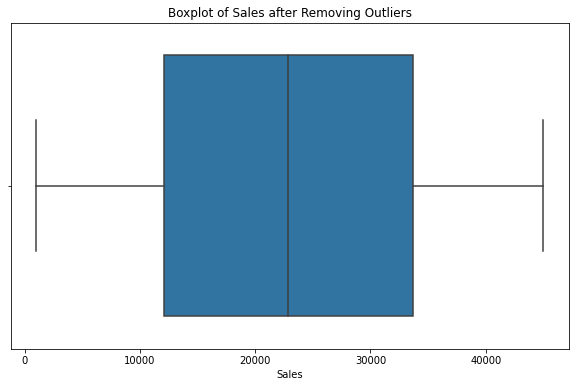

In [104]:
# визуализируем полученные результаты
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_data['Sales'])
plt.title('Boxplot of Sales after Removing Outliers')
plt.xlabel('Sales')
plt.show()

### Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

In [105]:
df.describe()

,ID,Sales
count,9800.000000,9800.000000
mean,4900.500000,22921.757753
std,2829.160653,12601.999793
min,1.000000,1002.790000
25%,2450.750000,12135.625000
50%,4900.500000,22882.060000
75%,7350.250000,33730.130000
max,9800.000000,44995.410000


In [106]:
# с помощью квантилей определяем группу продаж
bins = [0, df['Sales'].quantile(0.33), df['Sales'].quantile(0.67), df['Sales'].max()]
labels = ['Низкие продажи', 'Средние продажи', 'Высокие продажи']
df['Sale_group'] = pd.cut(df['Sales'], bins=bins, labels=labels, include_lowest=True)

In [107]:
df.head()

,ID,Order_Date,Class,Region,Sub_Category,Sales,Year,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,2018,Высокие продажи
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,2018,Средние продажи
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,2018,Высокие продажи
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00,2018,Низкие продажи
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,2018,Средние продажи


In [108]:
# группируем данные на основе региона и группы продаж
grouped = df.groupby(['Region', 'Sale_group'], as_index=False)\
    .agg({'Sales': 'sum'}) 
grouped

,Region,Sale_group,Sales
0,Владивосток,Низкие продажи,7643757.92
1,Владивосток,Средние продажи,20677757.99
2,Владивосток,Высокие продажи,35631171.06
3,Калиниград,Низкие продажи,8702213.69
4,Калиниград,Средние продажи,25625537.17
5,Калиниград,Высокие продажи,37602548.83
6,Москва,Низкие продажи,4225440.43
7,Москва,Средние продажи,12528714.87
8,Москва,Высокие продажи,20137496.21
9,Урал,Низкие продажи,6294822.84


In [109]:
# визуализируем данные
fig = px.histogram(grouped, x="Region", y="Sales", color="Sale_group")
fig.show()

In [120]:
print('Низкие продажи - от 0 до', round(df['Sales'].quantile(0.33),2))
print('Средние продажи - от', round(df['Sales'].quantile(0.33),1), 'до', round(df['Sales'].quantile(0.67),2))
print('Высокие продажи - от', round(df['Sales'].quantile(0.67),1), 'до', round(df['Sales'].max(),2))

Низкие продажи - от 0 до 15496.39
Средние продажи - от 15496.4 до 30247.29
Высокие продажи - от 30247.3 до 44995.41


In [122]:
sale_group = df \
    .groupby(['Sale_group'], as_index=False)\
    .agg({'Sales': 'sum'}) 
sale_group

,Sale_group,Sales
0,Низкие продажи,2.686623e+07
1,Средние продажи,7.640923e+07
2,Высокие продажи,1.213578e+08


In [123]:
2.686623e+07 < 7.640923e+07 < 1.213578e+08 

True

### Вывод 
Наиболее «прибыльной» группой выделяются высокие продажи, где сумма сделки колеблется от 30 000 до 45 000 рублей. 

Визуализация данных наглядно демонстрирует эту тенденцию во всех четырех регионах. 

Особенно примечательны результаты в Калининграде и Владивостоке, где объем продаж достигает наивысших уровней.